In [1]:
import pandas as pd
import numpy as np

# SUE calculations
- SUE stands for standardised unexpected earnings model
- Standardized unex-pected earnings (SUE) model was firstly presented by Rendleman, Hones and Latane (1982), and the model was used to measure PEAD by Bernard and Thomas (1989), who pointed out that the drifting magnitude is more obvious in small-cap firms than the large one
- This notebook constructs SUE model with quarterly report data of the microcap market 

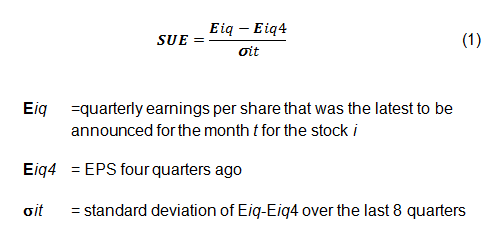

In [2]:
from IPython.core.display import Image, display
display(Image('../pictures/sue formula.png', width=1000, unconfined=True))

In [3]:
df_pred =pd.read_csv("../dataset/df_pred.csv")
df_std =pd.read_csv("../dataset/df_std.csv")
actual_eps = pd.read_csv("../dataset/actual_eps.csv")

### Data Preprocessing

In [4]:
# we have to drop some columns
# also have to drop some ticker names such as 'ZSAN'
# we also have to transpose it so the dates are correct , or maybe we have to transpose the other 2 back for the backtesting. idk yet
actual_eps = actual_eps.drop(columns = ['Unnamed: 0'])

In [5]:
names = ['TCON','TMBR', 'TAT', 'BSTC','ZSAN','RCKT','TAT','LLEXQ','WSTL','NTRP','JCAP','RKDA','RMNI','PATI','ZEUS']

actual_eps = actual_eps[~actual_eps['Ticker'].isin(names)]


In [6]:
actual_eps = actual_eps.reset_index().drop(columns = ['index'])

In [7]:
actual_eps

,Ticker,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30,2019-06-30,2019-03-31,2018-12-31,2018-09-30,...,2017-06-30,2017-03-31,2016-12-31,2016-09-30,2016-06-30,2016-03-31,2015-12-31,2015-09-30,2015-06-30,2015-03-31
0,ZNOG,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,-0.03,-0.52,0.02,...,-0.100,-0.070,-0.040,-0.040,-0.080,-0.040,-0.02,-0.05,-0.060,-0.070
1,ZIVO,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.03,...,-0.010,-0.010,-0.010,-0.010,-0.020,-0.010,0.00,-0.01,-0.020,-0.010
2,ZGNX,-1.08,-0.96,-0.54,-1.20,-6.75,-0.89,-0.83,-0.49,-1.08,...,-0.930,-0.860,-0.940,-0.690,-0.760,-0.420,-0.50,-0.65,3.780,-1.200
3,ZAGG,0.21,-0.11,-2.54,0.86,0.30,-0.18,-0.50,0.52,0.52,...,0.120,-0.220,-0.150,-0.250,-0.040,-0.120,0.18,0.13,0.130,0.110
4,YEWB,0.02,0.01,0.00,-0.04,0.02,0.03,0.01,-0.06,-0.01,...,0.200,0.000,-0.030,0.020,0.030,0.020,0.03,0.02,0.040,0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,ABMC,-0.01,0.00,-0.01,-0.01,0.00,0.00,-0.01,-0.01,-0.01,...,-0.010,0.000,0.000,-0.010,0.000,0.000,-0.01,0.00,-0.010,0.000
825,ABIO,-0.33,-0.73,-0.83,-0.69,-0.76,-1.14,-1.86,-1.80,-1.98,...,-10.619,-8.639,-8.279,-9.179,-7.739,-7.199,-5.04,-5.58,-12.599,-16.378
826,ABEO,-0.08,-0.14,-0.52,-0.29,-0.35,-0.49,-0.39,-0.42,-0.34,...,-0.210,-0.130,-0.190,-0.080,-0.200,-0.170,-0.06,-0.19,-0.160,-0.100
827,ABCP,-0.04,-0.02,-0.03,-0.02,-0.03,-0.05,-0.02,0.02,-0.02,...,-0.030,-0.030,-0.010,-0.020,-0.020,-0.030,-0.02,-0.04,-0.030,-0.030


In [8]:
Ticker = actual_eps['Ticker']

In [9]:
actual_eps.drop(columns=['Ticker'],inplace = True)

In [10]:
eps_pred= df_pred
std_dev = df_std

In [11]:
std_dev.columns
#dtypes is still object here for the columns

Index(['2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31', '2019-03-31',
       '2019-06-30', '2019-09-30', '2019-12-31', '2020-03-31', '2020-06-30',
       '2020-09-30'],
      dtype='object')

In [12]:
eps_pred

,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30
0,-0.063441,-0.053670,-0.030196,-0.184089,-0.155888,-0.133376,-0.104402,-0.073318,-0.049929,-0.035641,-0.010979
1,-0.024105,-0.026855,-0.030779,-0.025000,-0.024252,-0.021831,-0.017728,-0.013630,-0.009533,-0.002099,-0.000559
2,-2.283128,-1.008599,-1.282417,-1.039207,-0.905966,-0.849995,-2.881836,-2.713671,-2.209332,-1.910794,-1.883635
3,0.161067,0.193817,0.362403,0.520717,0.281007,0.164050,0.173435,0.365824,-0.663197,-0.645041,-0.480740
4,-0.014754,-0.004877,-0.012197,-0.032553,-0.027780,-0.013705,-0.005123,-0.027262,-0.028939,0.014154,0.030541
...,...,...,...,...,...,...,...,...,...,...,...
824,-0.006364,-0.005760,-0.006818,-0.009552,-0.010152,-0.006970,-0.005910,-0.006515,-0.006667,-0.005150,-0.005303
825,-2.724683,-3.396105,-1.431635,1.472410,5.070052,7.338760,9.213294,8.736468,8.235220,6.501984,3.458363
826,-0.176192,-0.208313,-0.273640,-0.327920,-0.383721,-0.468804,-0.461848,-0.452762,-0.499252,-0.419412,-0.302406
827,-0.238168,-0.194787,-0.150262,-0.088893,-0.044883,-0.009401,0.034220,0.083475,0.126530,0.172342,-0.156555


In [13]:
actual_eps

,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30,2019-06-30,2019-03-31,2018-12-31,2018-09-30,2018-06-30,...,2017-06-30,2017-03-31,2016-12-31,2016-09-30,2016-06-30,2016-03-31,2015-12-31,2015-09-30,2015-06-30,2015-03-31
0,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,-0.03,-0.52,0.02,-0.02,...,-0.100,-0.070,-0.040,-0.040,-0.080,-0.040,-0.02,-0.05,-0.060,-0.070
1,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.03,-0.02,...,-0.010,-0.010,-0.010,-0.010,-0.020,-0.010,0.00,-0.01,-0.020,-0.010
2,-1.08,-0.96,-0.54,-1.20,-6.75,-0.89,-0.83,-0.49,-1.08,-0.83,...,-0.930,-0.860,-0.940,-0.690,-0.760,-0.420,-0.50,-0.65,3.780,-1.200
3,0.21,-0.11,-2.54,0.86,0.30,-0.18,-0.50,0.52,0.52,0.11,...,0.120,-0.220,-0.150,-0.250,-0.040,-0.120,0.18,0.13,0.130,0.110
4,0.02,0.01,0.00,-0.04,0.02,0.03,0.01,-0.06,-0.01,0.03,...,0.200,0.000,-0.030,0.020,0.030,0.020,0.03,0.02,0.040,0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,-0.01,0.00,-0.01,-0.01,0.00,0.00,-0.01,-0.01,-0.01,0.00,...,-0.010,0.000,0.000,-0.010,0.000,0.000,-0.01,0.00,-0.010,0.000
825,-0.33,-0.73,-0.83,-0.69,-0.76,-1.14,-1.86,-1.80,-1.98,-2.70,...,-10.619,-8.639,-8.279,-9.179,-7.739,-7.199,-5.04,-5.58,-12.599,-16.378
826,-0.08,-0.14,-0.52,-0.29,-0.35,-0.49,-0.39,-0.42,-0.34,-0.25,...,-0.210,-0.130,-0.190,-0.080,-0.200,-0.170,-0.06,-0.19,-0.160,-0.100
827,-0.04,-0.02,-0.03,-0.02,-0.03,-0.05,-0.02,0.02,-0.02,-0.03,...,-0.030,-0.030,-0.010,-0.020,-0.020,-0.030,-0.02,-0.04,-0.030,-0.030


In [14]:
actual_eps = actual_eps.iloc[::,:-12]


In [15]:
actual_eps

,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30,2019-06-30,2019-03-31,2018-12-31,2018-09-30,2018-06-30,2018-03-31
0,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,-0.03,-0.52,0.02,-0.02,-0.11
1,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.03,-0.02,-0.03
2,-1.08,-0.96,-0.54,-1.20,-6.75,-0.89,-0.83,-0.49,-1.08,-0.83,-0.87
3,0.21,-0.11,-2.54,0.86,0.30,-0.18,-0.50,0.52,0.52,0.11,0.25
4,0.02,0.01,0.00,-0.04,0.02,0.03,0.01,-0.06,-0.01,0.03,0.00
...,...,...,...,...,...,...,...,...,...,...,...
824,-0.01,0.00,-0.01,-0.01,0.00,0.00,-0.01,-0.01,-0.01,0.00,-0.01
825,-0.33,-0.73,-0.83,-0.69,-0.76,-1.14,-1.86,-1.80,-1.98,-2.70,-3.60
826,-0.08,-0.14,-0.52,-0.29,-0.35,-0.49,-0.39,-0.42,-0.34,-0.25,-0.18
827,-0.04,-0.02,-0.03,-0.02,-0.03,-0.05,-0.02,0.02,-0.02,-0.03,0.04


In [16]:
std_dev

,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30
0,0.032287,0.033575,0.039187,0.142028,0.142350,0.143590,0.144212,0.145193,0.146440,0.147114,0.147638
1,0.009045,0.009045,0.009847,0.008660,0.008348,0.008660,0.008660,0.008660,0.008660,0.009847,0.009962
2,1.379370,0.328491,0.327149,0.328255,0.294066,0.289697,1.694286,1.688918,1.701816,1.701024,1.702172
3,0.204871,0.204293,0.244516,0.274210,0.321653,0.328988,0.318237,0.370352,0.873820,0.873670,0.869338
4,0.076925,0.076693,0.077004,0.079487,0.079368,0.079368,0.079368,0.079810,0.079810,0.050834,0.051316
...,...,...,...,...,...,...,...,...,...,...,...
824,0.005222,0.005149,0.005222,0.005222,0.005149,0.005149,0.005222,0.005149,0.004924,0.005149,0.004924
825,2.476546,2.315952,2.692275,2.998127,3.229966,3.424695,3.407733,3.355153,3.102462,2.131396,1.642359
826,0.048077,0.055021,0.074727,0.093237,0.105955,0.129895,0.120840,0.118049,0.126155,0.132811,0.139501
827,0.487488,0.487488,0.487780,0.488569,0.488715,0.488327,0.488175,0.488004,0.488004,0.488157,0.143091


### Flip dates from right to left (for std and eps_pred)

In [17]:
std_dev.head(1)

,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30
0,0.032287,0.033575,0.039187,0.142028,0.14235,0.14359,0.144212,0.145193,0.14644,0.147114,0.147638


In [18]:
std_dev

,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30
0,0.032287,0.033575,0.039187,0.142028,0.142350,0.143590,0.144212,0.145193,0.146440,0.147114,0.147638
1,0.009045,0.009045,0.009847,0.008660,0.008348,0.008660,0.008660,0.008660,0.008660,0.009847,0.009962
2,1.379370,0.328491,0.327149,0.328255,0.294066,0.289697,1.694286,1.688918,1.701816,1.701024,1.702172
3,0.204871,0.204293,0.244516,0.274210,0.321653,0.328988,0.318237,0.370352,0.873820,0.873670,0.869338
4,0.076925,0.076693,0.077004,0.079487,0.079368,0.079368,0.079368,0.079810,0.079810,0.050834,0.051316
...,...,...,...,...,...,...,...,...,...,...,...
824,0.005222,0.005149,0.005222,0.005222,0.005149,0.005149,0.005222,0.005149,0.004924,0.005149,0.004924
825,2.476546,2.315952,2.692275,2.998127,3.229966,3.424695,3.407733,3.355153,3.102462,2.131396,1.642359
826,0.048077,0.055021,0.074727,0.093237,0.105955,0.129895,0.120840,0.118049,0.126155,0.132811,0.139501
827,0.487488,0.487488,0.487780,0.488569,0.488715,0.488327,0.488175,0.488004,0.488004,0.488157,0.143091


In [19]:
#reverse the order of std_dev
data = std_dev
columns = data.columns.tolist()
columns = columns[::-1]
data = data[columns]
std_dev = data

In [20]:
#rever the order of eps_pred
data = eps_pred
columns = data.columns.tolist()
columns = columns[::-1]
data = data[columns]
eps_pred = data

In [21]:
actual_eps

,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30,2019-06-30,2019-03-31,2018-12-31,2018-09-30,2018-06-30,2018-03-31
0,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,-0.03,-0.52,0.02,-0.02,-0.11
1,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.03,-0.02,-0.03
2,-1.08,-0.96,-0.54,-1.20,-6.75,-0.89,-0.83,-0.49,-1.08,-0.83,-0.87
3,0.21,-0.11,-2.54,0.86,0.30,-0.18,-0.50,0.52,0.52,0.11,0.25
4,0.02,0.01,0.00,-0.04,0.02,0.03,0.01,-0.06,-0.01,0.03,0.00
...,...,...,...,...,...,...,...,...,...,...,...
824,-0.01,0.00,-0.01,-0.01,0.00,0.00,-0.01,-0.01,-0.01,0.00,-0.01
825,-0.33,-0.73,-0.83,-0.69,-0.76,-1.14,-1.86,-1.80,-1.98,-2.70,-3.60
826,-0.08,-0.14,-0.52,-0.29,-0.35,-0.49,-0.39,-0.42,-0.34,-0.25,-0.18
827,-0.04,-0.02,-0.03,-0.02,-0.03,-0.05,-0.02,0.02,-0.02,-0.03,0.04


In [22]:
actual_eps.isna().sum().sum()

0

In [23]:
actual_eps = actual_eps.reset_index().drop(columns = ['index'])

In [24]:
#find out how many 0 there are
std_dev.isin([0]).any().sum()

11

In [25]:
# we have to bfill since our time horizon goes from right to left, and also for rows, not columns, so we put axis = 1
std_dev.fillna(method='bfill', inplace = True, axis= 1)

In [26]:
# replace 0 with nan and then forwardfill it
std_dev.replace(0, np.nan, inplace = True)

In [27]:
unexpected_earning = actual_eps-eps_pred


In [28]:
# find SUE
sue = unexpected_earning.truediv(std_dev)
sue

,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30,2019-06-30,2019-03-31,2018-12-31,2018-09-30,2018-06-30,2018-03-31
0,0.006633,0.174294,0.272663,0.436094,0.585264,0.789581,0.884354,-2.365101,1.280951,1.002831,-1.442053
1,-0.947676,0.213138,-0.053899,0.419205,0.892309,1.366180,0.509257,1.732051,0.079134,0.757799,-0.651728
2,0.472123,0.558954,0.980912,0.896237,-2.283064,-0.138093,0.258329,1.673111,0.618729,0.543696,1.024473
3,0.794558,0.612406,-2.147816,1.334341,0.397705,-1.045781,-2.428106,-0.002617,0.644527,-0.410277,0.434092
4,-0.205414,-0.081714,0.362602,-0.159606,0.316537,0.550664,0.476014,-0.345300,0.028525,0.454760,0.191799
...,...,...,...,...,...,...,...,...,...,...,...
824,-0.953959,1.000229,-0.677003,-0.676763,1.131773,1.353527,0.029424,-0.085700,-0.609272,1.118606,-0.696311
825,-2.306660,-3.393074,-2.921944,-2.809549,-2.926665,-2.475771,-2.145550,-1.091485,-0.203681,0.300570,-0.353443
826,1.594294,2.103836,-0.164468,1.378762,0.925585,-0.163176,-0.059260,-0.987593,-0.888042,-0.757656,-0.079200
827,0.814552,-0.394018,-0.320755,-0.212038,-0.131551,-0.083139,0.050915,0.222881,0.267050,0.338033,0.570616


In [29]:
# reshape the sue dataframe a little
sue['Ticker']=Ticker

In [30]:
Ticker

0      ZNOG
1      ZIVO
2      ZGNX
3      ZAGG
4      YEWB
       ... 
824    ABMC
825    ABIO
826    ABEO
827    ABCP
828    AAME
Name: Ticker, Length: 829, dtype: object

In [31]:
len(Ticker)

829

In [32]:
sue.set_index('Ticker',inplace=True)

In [33]:
#export sue
sue.to_csv('../dataset/sue.csv')

In [41]:
sue

,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30,2019-06-30,2019-03-31,2018-12-31,2018-09-30,2018-06-30,2018-03-31
Ticker,,,,,,,,,,,
ZNOG,0.006633,0.174294,0.272663,0.436094,0.585264,0.789581,0.884354,-2.365101,1.280951,1.002831,-1.442053
ZIVO,-0.947676,0.213138,-0.053899,0.419205,0.892309,1.366180,0.509257,1.732051,0.079134,0.757799,-0.651728
ZGNX,0.472123,0.558954,0.980912,0.896237,-2.283064,-0.138093,0.258329,1.673111,0.618729,0.543696,1.024473
ZAGG,0.794558,0.612406,-2.147816,1.334341,0.397705,-1.045781,-2.428106,-0.002617,0.644527,-0.410277,0.434092
YEWB,-0.205414,-0.081714,0.362602,-0.159606,0.316537,0.550664,0.476014,-0.345300,0.028525,0.454760,0.191799
...,...,...,...,...,...,...,...,...,...,...,...
ABMC,-0.953959,1.000229,-0.677003,-0.676763,1.131773,1.353527,0.029424,-0.085700,-0.609272,1.118606,-0.696311
ABIO,-2.306660,-3.393074,-2.921944,-2.809549,-2.926665,-2.475771,-2.145550,-1.091485,-0.203681,0.300570,-0.353443
ABEO,1.594294,2.103836,-0.164468,1.378762,0.925585,-0.163176,-0.059260,-0.987593,-0.888042,-0.757656,-0.079200


In [45]:
np.percentile(sue[date],10)

nan

In [42]:
cutoff_list = {}

cutoff_list.append(np.percentile(sue[date],10))    


In [43]:
cutoff_list

[nan]

In [47]:
sue.columns

Index(['2020-09-30', '2020-06-30', '2020-03-31', '2019-12-31', '2019-09-30',
       '2019-06-30', '2019-03-31', '2018-12-31', '2018-09-30', '2018-06-30',
       '2018-03-31'],
      dtype='object')

In [49]:
type(sue['2020-09-30'][2])

numpy.float64

In [50]:
type(sue['2018-03-31'])

pandas.core.series.Series

In [71]:
#fill null in sue with 0
sue.fillna(0,inplace=True)

In [72]:
sue[date]

Ticker
ZNOG   -1.442053
ZIVO   -0.651728
ZGNX    1.024473
ZAGG    0.434092
YEWB    0.191799
          ...   
ABMC   -0.696311
ABIO   -0.353443
ABEO   -0.079200
ABCP    0.570616
AAME   -1.972780
Name: 2018-03-31, Length: 829, dtype: float64

In [73]:
type(sue[date])

pandas.core.series.Series

In [74]:
sue.isna().sum().sum()

0

In [75]:
#create a list called cutoffs and export it
cutoffs = {}
for date in sue.columns.tolist()[2:]:
    print(date)
    cutoff_list = []
    cutoff_list.append(np.percentile((sue[date]),10))    
    cutoff_list.append(np.percentile(sue[date],15))
    cutoff_list.append(np.percentile(sue[date],20))
    cutoff_list.append(np.percentile(sue[date],25))
    cutoff_list.append(np.percentile(sue[date],30))
    cutoff_list.append(np.percentile(sue[date],40))
    cutoff_list.append(np.percentile(sue[date],50))
    cutoff_list.append(np.percentile(sue[date],60))
    cutoff_list.append(np.percentile(sue[date],70))
    cutoff_list.append(np.percentile(sue[date],75))
    cutoff_list.append(np.percentile(sue[date],80))
    cutoff_list.append(np.percentile(sue[date],85))
    cutoff_list.append(np.percentile(sue[date],90))
    cutoffs[date] = cutoff_list
column_list = [10,15,20,25,30,40,50,60,70,75,80,85,90]
cutoff = pd.DataFrame.from_dict(cutoffs, orient='index',columns=column_list)
#cutoff



2020-03-31
2019-12-31
2019-09-30
2019-06-30
2019-03-31
2018-12-31
2018-09-30
2018-06-30
2018-03-31


In [76]:
cutoff

,10,15,20,25,30,40,50,60,70,75,80,85,90
2020-03-31,-1.932890,-1.635606,-1.382247,-1.169401,-0.972094,-0.683535,-0.451444,-0.236875,0.000000,0.121295,0.283188,0.453192,0.707694
2019-12-31,-1.489477,-1.187768,-0.947775,-0.735454,-0.562960,-0.362592,-0.196684,-0.002261,0.199069,0.363454,0.516841,0.662818,0.898294
2019-09-30,-1.210893,-0.915105,-0.720010,-0.600148,-0.487193,-0.261321,-0.086079,0.091342,0.314429,0.432340,0.565908,0.711610,0.880516
2019-06-30,-1.212269,-0.947584,-0.733188,-0.617000,-0.477628,-0.266292,-0.102563,0.109729,0.328202,0.419891,0.546920,0.678072,0.934622
2019-03-31,-1.385835,-1.101962,-0.923334,-0.762226,-0.603044,-0.347240,-0.115672,0.086218,0.312612,0.438803,0.558876,0.727624,0.970844
2018-12-31,-1.624969,-1.301984,-1.105444,-0.854957,-0.710286,-0.413133,-0.149316,0.089126,0.358627,0.480740,0.600920,0.756874,1.005625
2018-09-30,-1.311357,-1.009416,-0.786555,-0.620788,-0.499642,-0.215606,0.056603,0.241577,0.477775,0.612750,0.740525,0.881607,1.113001
2018-06-30,-1.309403,-0.981035,-0.792077,-0.614753,-0.447723,-0.177885,0.050923,0.294754,0.570049,0.705262,0.807900,0.972931,1.125014
2018-03-31,-1.448849,-1.101044,-0.905670,-0.746463,-0.562563,-0.305793,0.023529,0.296322,0.571894,0.699077,0.868118,0.997387,1.189422


In [78]:
cutoff.to_csv('../dataset/sue_cutoffs.csv',index = False)